### Download the flowers dataset
<font size="4"> http://download.tensorflow.org/example_images/flower_photos.tgz </font>

In [1]:
#You can download the data manually as well instead of using 'wget'
!wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

### Explore the dataset

In [2]:
#Read the dataset
import tarfile
dataset = tarfile.open('flower_photos.tgz')

In [3]:
#Print out all the directories
for name in dataset.getnames():
    tar_member = dataset.getmember(name)
    if(tar_member.isdir()):
         print(name)

flower_photos
flower_photos/roses
flower_photos/sunflowers
flower_photos/tulips
flower_photos/daisy
flower_photos/dandelion


### Building Info on the dataset

In [ ]:
#We will build a pandas dataset
import pandas as pd
df = pd.DataFrame(columns=['class','dir','image_file'])

In [ ]:
#Run through tarfile members 
for name in dataset.getnames():
    
    tar_mem = dataset.getmember(name)
    
    #Check if it is a file
    if(tar_mem.isfile() and name.endswith('.jpg')):
        #Build directory and class info
        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]
        #Add record to the dataframe
        df.loc[df.shape[0]] = [im_class, im_dir, name]
        

In [ ]:
#Check contents of the dataframe
print('Total images: ', df.shape[0])
df.head()

Total images:  3670


,class,dir,image_file
0,roses,flower_photos/roses,flower_photos/roses/14810868100_87eb739f26_m.jpg
1,roses,flower_photos/roses,flower_photos/roses/1446090416_f0cad5fde4.jpg
2,roses,flower_photos/roses,flower_photos/roses/15319767030_e6c5602a77_m.jpg
3,roses,flower_photos/roses,flower_photos/roses/15032112248_30c5284e54_n.jpg
4,roses,flower_photos/roses,flower_photos/roses/7211616670_2d49ecb3a5_m.jpg


In [ ]:
#images by class
print(df.groupby(['class']).size())

class
daisy         633
dandelion     898
roses         641
sunflowers    699
tulips        799
dtype: int64


### Extract all images to disk

In [ ]:
#extract data
dataset.extractall(path='data/')

### Create training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.to_csv('data/flower_photos/train.csv',index=False)
test_df.to_csv('data/flower_photos/test.csv', index=False)

In [ ]:
import tensorflow as tf

#### Load image from the disk

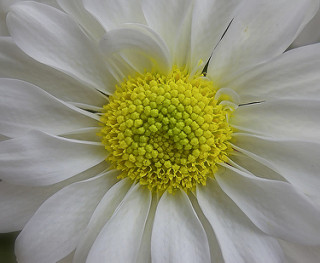

In [ ]:
#Load an image using Keras image class
image_file = 'data/flower_photos/daisy/100080576_f52e8ee070_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)

#Inspect image
flower_image

<font size="2">Keras image class is a wrapper for PIL Image class</font>

In [ ]:
#Lets check the class type for Keras image
type(flower_image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
flower_image2 = tf.keras.preprocessing.image.load_img('data/flower_photos/daisy/10140303196_b88d3d6cec.jpg')

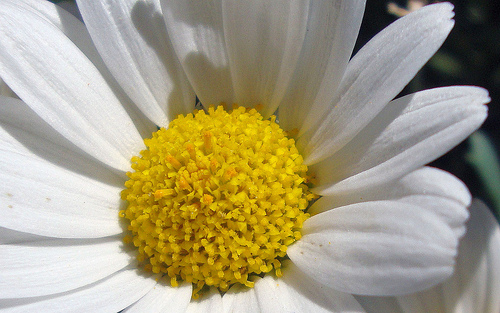

In [ ]:
flower_image2

### Image Size

In [ ]:
#Size of the image
flower_image.size

(320, 263)

In [ ]:
#Size of 2nd image
flower_image2.size

(500, 313)

In [ ]:
#Resizing image
flower_image = flower_image.resize([128,128])

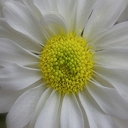

In [ ]:
flower_image

### Converting image to numpy array for ML

In [ ]:
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)
print('Shape of numpy array', flower_array.shape)

Shape of numpy array (128, 128, 3)


In [ ]:
#Check the contents of the array
flower_array

array([[[137., 137., 135.],
        [144., 145., 145.],
        [148., 149., 149.],
        ...,
        [153., 153., 151.],
        [154., 154., 153.],
        [152., 152., 153.]],

       [[136., 136., 134.],
        [144., 143., 143.],
        [148., 147., 148.],
        ...,
        [154., 154., 152.],
        [153., 153., 152.],
        [150., 150., 150.]],

       [[135., 134., 130.],
        [142., 141., 138.],
        [146., 144., 144.],
        ...,
        [156., 156., 154.],
        [152., 152., 151.],
        [147., 147., 147.]],

       ...,

       [[ 44.,  46.,  26.],
        [ 44.,  46.,  26.],
        [ 44.,  46.,  26.],
        ...,
        [129., 125., 124.],
        [128., 124., 123.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        ...,
        [131., 127., 126.],
        [130., 126., 125.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 45.,  

### Converting numpy array to image

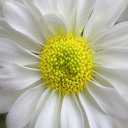

In [ ]:
new_image = tf.keras.preprocessing.image.array_to_img(flower_array)

#Show image
new_image

### Read training and test data

In [ ]:
import pandas as pd
train_df = pd.read_csv('data/flower_photos/train.csv')
test_df = pd.read_csv('data/flower_photos/test.csv')

In [ ]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


In [ ]:
#Define some parameters
img_size = 60
img_depth = 3  

### Build batch generator

In [ ]:
df.shape[0]

3670

In [ ]:
import numpy as np

In [ ]:
df.head()

,class,dir,image_file
0,roses,flower_photos/roses,flower_photos/roses/14810868100_87eb739f26_m.jpg
1,roses,flower_photos/roses,flower_photos/roses/1446090416_f0cad5fde4.jpg
2,roses,flower_photos/roses,flower_photos/roses/15319767030_e6c5602a77_m.jpg
3,roses,flower_photos/roses,flower_photos/roses/15032112248_30c5284e54_n.jpg
4,roses,flower_photos/roses,flower_photos/roses/7211616670_2d49ecb3a5_m.jpg


In [ ]:
def batch_generator(df, batchsize=32):   
    
    while True:       
                
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0], batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_names.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

### Build CNN Model

In [ ]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Add Layers
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 60, 60, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6422656   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batchsize=batchsize)

In [ ]:
train_df.shape[0]

2936

In [ ]:
model.fit_generator(train_generator, 
                          epochs=10,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
45/45 [==============================] - 42s 230ms/step - loss: 1.8249 - accuracy: 0.3688 - val_loss: 1.2571 - val_accuracy: 0.4972
Epoch 2/10
45/45 [==============================] - 10s 231ms/step - loss: 1.0992 - accuracy: 0.5469 - val_loss: 1.1709 - val_accuracy: 0.5213
Epoch 3/10
45/45 [==============================] - 11s 248ms/step - loss: 0.9716 - accuracy: 0.6361 - val_loss: 0.9573 - val_accuracy: 0.6321
Epoch 4/10
45/45 [==============================] - 11s 244ms/step - loss: 0.7569 - accuracy: 0.7153 - val_loss: 0.9304 - val_accuracy: 0.6463
Epoch 5/10
45/45 [==============================] - 10s 232ms/step - loss: 0.5779 - accuracy: 0.7969 - val_loss: 1.1061 - val_accuracy: 0.6108
Epoch 6/10
45/45 [==============================] - 10s 229ms/step - loss: 0.4234 - accuracy: 0.8601 - val_loss: 1.0293 - val_accuracy: 0.5980
Epoch 7/10
45/45 [==============================] - 10s 229ms/step - loss: 0.3085 - accuracy: 0.9059 - val_loss: 1.1977 - val_accuracy: 0.6264

In [ ]:
# Image Augmentation Techniques

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Load image from the disk

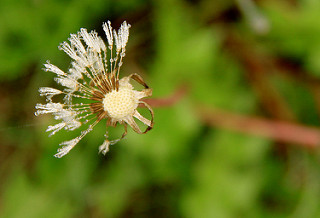

In [ ]:
#Load an image using Keras image class
image_file = 'data/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)

#Inspect image
flower_image

Build a function to display Original and Transformed Image

In [ ]:
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

### Flip an image

In [ ]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [ ]:
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

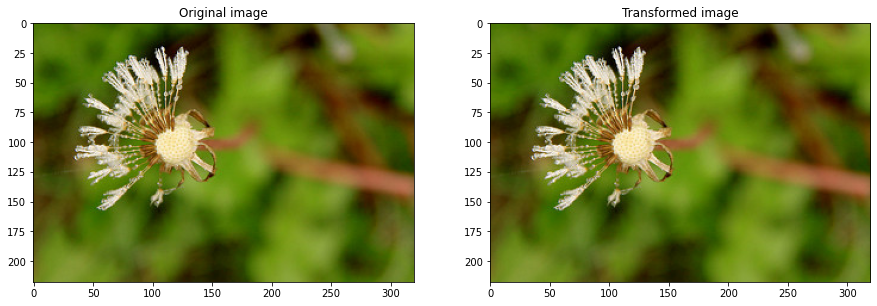

In [ ]:
plot_images(flower_image, transformed_image)

### Shifting image

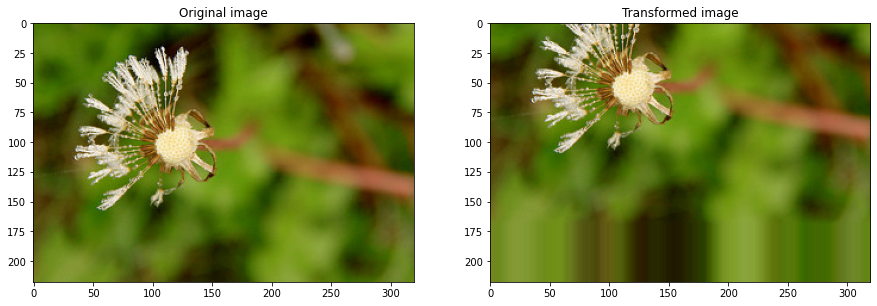

In [ ]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=50)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Rotating image

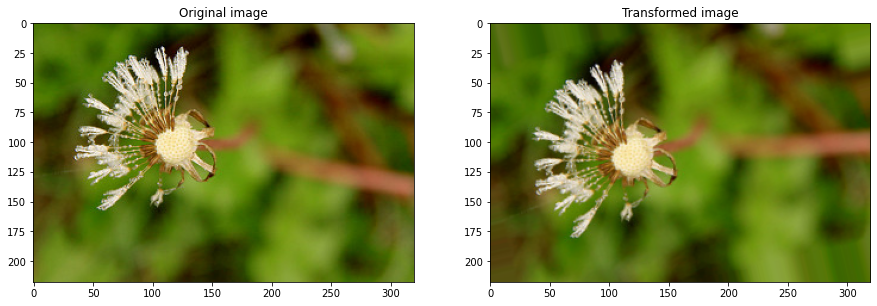

In [ ]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=100)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Zooming image

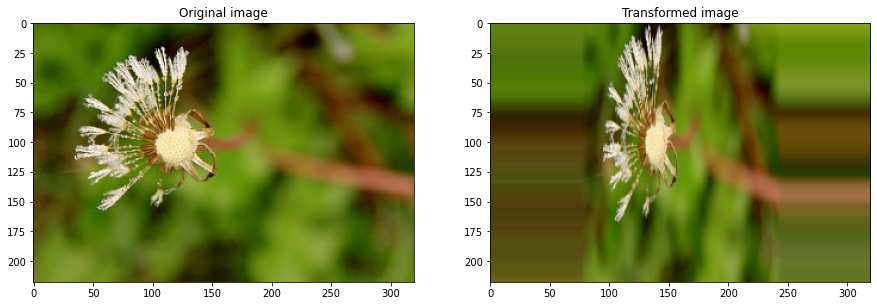

In [ ]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.3, 2.3])
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Applying multiple transforms

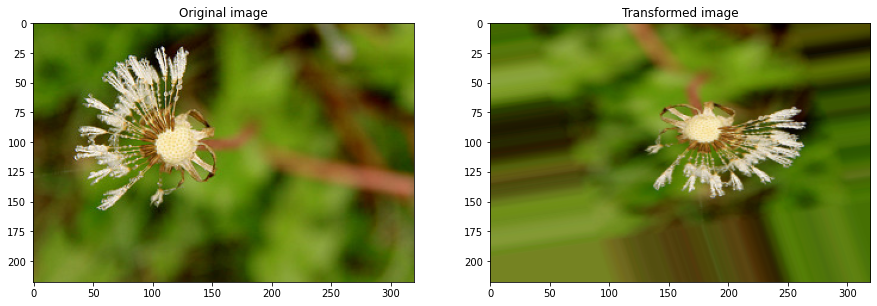

In [ ]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.3,
                                                               height_shift_range=0.5,
                                                               rotation_range=90,
                                                               shear_range=0.2,
                                                               zoom_range=0.7)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

In [ ]:
#Model Performance after Image Augmentation

### Read training and test data

In [ ]:
import pandas as pd
train_df = pd.read_csv('data/flower_photos/train.csv')
test_df = pd.read_csv('data/flower_photos/test.csv')

In [ ]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


In [ ]:
#Define some parameters
img_size = 60
img_depth = 3  

### Build batch generator

In [ ]:
import numpy as np

In [ ]:
def batch_generator(df, batchsize=32, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    
    while True:       
        
        
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0],batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            if(train_mode):
                #Apply transform
                flower_image =  img_generator.random_transform(flower_image)
            
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_names.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

### Build CNN Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
model.fit_generator(train_generator, 
                          epochs=50,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
45/45 [==============================] - 14s 304ms/step - loss: 1.8426 - accuracy: 0.3618 - val_loss: 1.2245 - val_accuracy: 0.4886
Epoch 2/50
45/45 [==============================] - 13s 301ms/step - loss: 1.2004 - accuracy: 0.5139 - val_loss: 1.1844 - val_accuracy: 0.5284
Epoch 3/50
45/45 [==============================] - 14s 326ms/step - loss: 1.0821 - accuracy: 0.5580 - val_loss: 1.1692 - val_accuracy: 0.5327
Epoch 4/50
45/45 [==============================] - 14s 317ms/step - loss: 1.0148 - accuracy: 0.5934 - val_loss: 0.9203 - val_accuracy: 0.6491
Epoch 5/50
45/45 [==============================] - 13s 299ms/step - loss: 0.9916 - accuracy: 0.6132 - val_loss: 0.8986 - val_accuracy: 0.6562
Epoch 6/50
45/45 [==============================] - 13s 300ms/step - loss: 0.9436 - accuracy: 0.6375 - val_loss: 0.8879 - val_accuracy: 0.6605
Epoch 7/50
45/45 [==============================] - 13s 304ms/step - loss: 0.8781 - accuracy: 0.6556 - val_loss: 0.9622 - val_accuracy: 0.6065

### Incorporating Transfer Learning

### Read training and test data

In [ ]:
import pandas as pd
train_df = pd.read_csv('data/flower_photos/train.csv')
test_df = pd.read_csv('data/flower_photos/test.csv')

In [ ]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


In [ ]:
#Define some parameters
img_size = 224
img_depth = 3  

### Build batch generator

In [ ]:
import numpy as np

In [ ]:
def batch_generator(df, batchsize=32, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    
    while True:       
        
        
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0],batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            if(train_mode):
                #Apply transform
                flower_image =  img_generator.random_transform(flower_image)
            
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_names.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class
        
        batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)
        
        yield batch_images, batch_labels          

### Load pre-trained model

In [ ]:
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, img_depth),
                                          weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [ ]:
print(len(model.layers))
for layer in model.layers[120:]:
    layer.trainable =  True    

175


In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

### Add FC layer for new classes

In [ ]:
#get Output layer of Pre0trained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(len(class_names),activation='softmax')(x)

### Building final model for Classification

In [ ]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
final_model.fit_generator(train_generator, 
                          epochs=10,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
45/45 [==============================] - 46s 963ms/step - loss: 13.0217 - accuracy: 0.5669 - val_loss: 48.5714 - val_accuracy: 0.6236
Epoch 2/10
45/45 [==============================] - 42s 940ms/step - loss: 0.3662 - accuracy: 0.8871 - val_loss: 2.3344 - val_accuracy: 0.8509
Epoch 3/10
45/45 [==============================] - 41s 934ms/step - loss: 0.2266 - accuracy: 0.9249 - val_loss: 0.2855 - val_accuracy: 0.9389
Epoch 4/10
45/45 [==============================] - 41s 938ms/step - loss: 0.1647 - accuracy: 0.9448 - val_loss: 0.3050 - val_accuracy: 0.9020
Epoch 5/10
45/45 [==============================] - 41s 938ms/step - loss: 0.1092 - accuracy: 0.9683 - val_loss: 0.2603 - val_accuracy: 0.9048
Epoch 6/10
45/45 [==============================] - 42s 940ms/step - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0.3686 - val_accuracy: 0.9034
Epoch 7/10
45/45 [==============================] - 42s 942ms/step - loss: 0.0832 - accuracy: 0.9707 - val_loss: 0.2595 - val_accuracy: 0.93